In [1]:
#!pip install tensorflow==2.10.1  tensorflow-gpu==2.10 opencv-python matplotlib

In [2]:
print("Hello")

Hello


In [3]:
import tensorflow as tf
tf.test.is_gpu_available(
    cuda_only=False, min_cuda_compute_capability=None
)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [4]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [5]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
# Removing Dogy Images


In [7]:
import cv2
import imghdr
import os

In [8]:
data_dir = 'data'

In [9]:
image_exts=['jpeg','jpg','bmp','png']

In [10]:
image_exts[3]

'png'

In [11]:
os.listdir(data_dir)

['happy', 'sad']

In [12]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image{}'.format(image_path))
            

Issue with imagedata\happy\.ipynb_checkpoints


In [13]:
#Load Data

In [14]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
@six.add_metaclass(abc.ABCMeta)
class DatasetV2(collections_abc.Iterable, tracking_base.Trackable,
                composite_tensor.CompositeTensor):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dtype=int32)
  tf.Ten

In [15]:
import numpy as np
from matplotlib import pyplot as plt

In [16]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 172 files belonging to 2 classes.


In [17]:
data_iterator = data.as_numpy_iterator()

In [18]:
batch = data_iterator.next()

In [19]:
batch

(array([[[[9.71718750e+01, 1.01171875e+02, 1.12171875e+02],
          [9.95156250e+01, 1.03515625e+02, 1.14515625e+02],
          [1.01859375e+02, 1.05859375e+02, 1.16859375e+02],
          ...,
          [8.62890625e+01, 8.80000000e+01, 9.74296875e+01],
          [8.42578125e+01, 8.65156250e+01, 9.77421875e+01],
          [8.67421875e+01, 8.87421875e+01, 1.00742188e+02]],
 
         [[9.78437500e+01, 1.01843750e+02, 1.12843750e+02],
          [1.00187500e+02, 1.04187500e+02, 1.15187500e+02],
          [1.02242554e+02, 1.06242554e+02, 1.17242554e+02],
          ...,
          [8.62890625e+01, 8.80000000e+01, 9.74296875e+01],
          [8.47564697e+01, 8.75129395e+01, 9.72435303e+01],
          [8.67999268e+01, 8.88576660e+01, 1.00684448e+02]],
 
         [[9.86250000e+01, 1.02625000e+02, 1.14078125e+02],
          [1.00968750e+02, 1.04968750e+02, 1.16421875e+02],
          [1.02882812e+02, 1.06882812e+02, 1.18335938e+02],
          ...,
          [8.67421875e+01, 8.84531250e+01, 9.7882

In [20]:
len(batch)

2

In [21]:
batch[1]

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0])

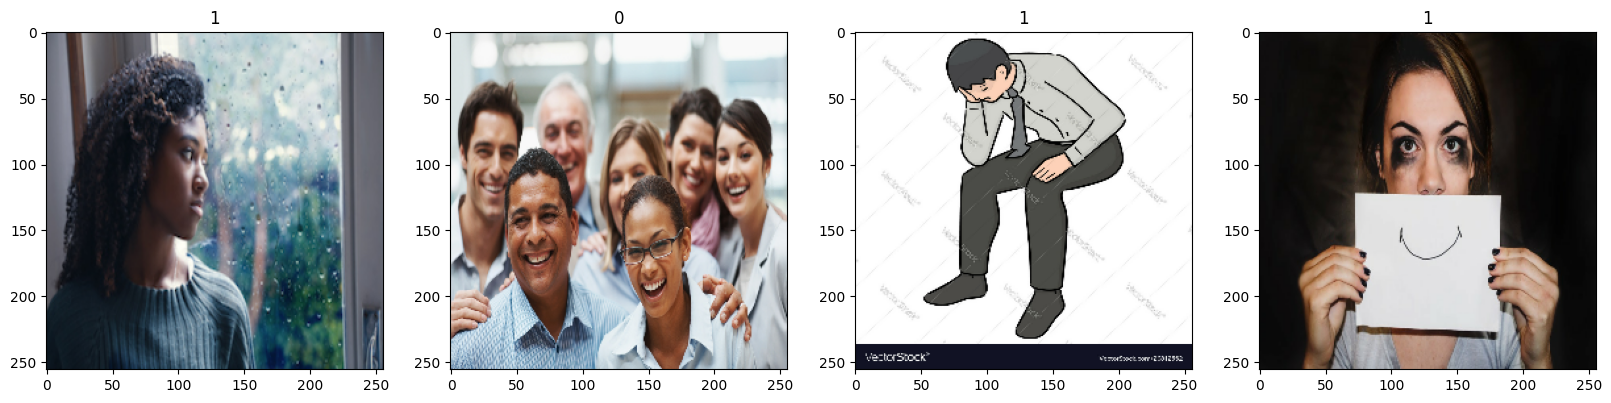

In [22]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [23]:
#PReprocessing Data

In [24]:
batch[0].max()

255.0

In [25]:
batch[0].min()

0.0

In [26]:
scaled = batch[0]/255

In [27]:
scaled.max()


1.0

In [28]:
scaled = data.map(lambda x,y: (x/255, y))

In [29]:
#data.as_numpy_iterator().next()

In [30]:
scaled_iterator = data.as_numpy_iterator()

In [31]:
batch = scaled_iterator.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


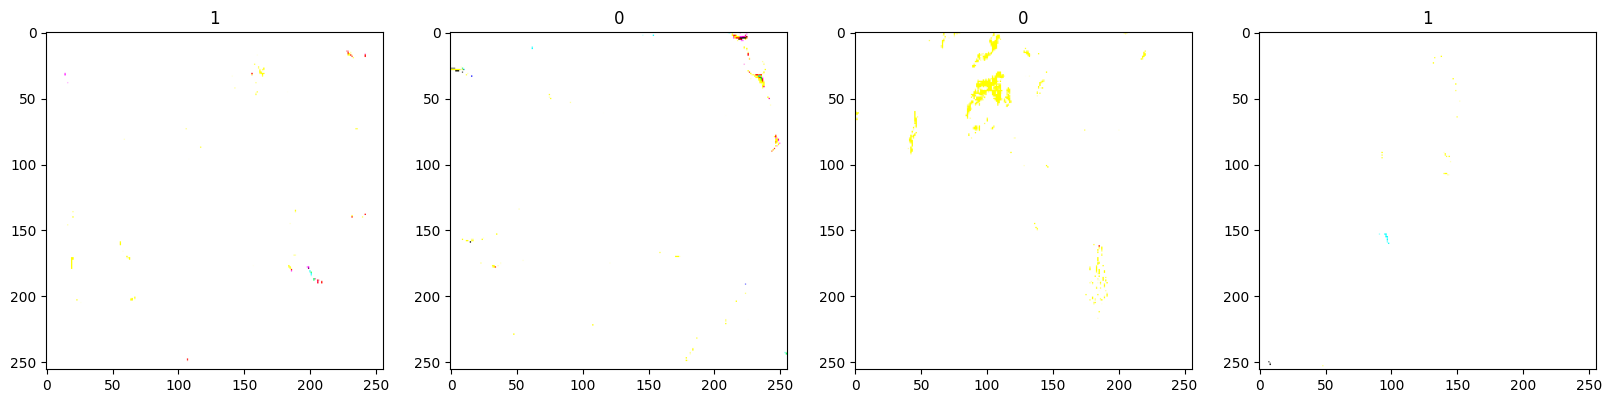

In [32]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [33]:
batch[0].min()


0.0

In [34]:
batch[0].max()


255.0

In [35]:
#Split DATA


In [36]:
len(data)

6

In [37]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1


In [38]:
train_size

4

In [39]:
test_size

1

In [40]:
val_size

2

In [41]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size).take(test_size)

In [42]:
#DEEP MODEL

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [44]:
model = Sequential()

In [45]:
model.add(Conv2D(16,(3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [46]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [48]:
# train

In [49]:
logdir='logs'


In [50]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [51]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks = [tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 10s 559ms/step - loss: 21.6274 - accuracy: 0.5000 - val_loss: 0.8465 - val_accuracy: 0.6591
Epoch 2/20
4/4 [==============================] - 2s 411ms/step - loss: 2.0068 - accuracy: 0.7188 - val_loss: 0.9529 - val_accuracy: 0.7500
Epoch 3/20
4/4 [==============================] - 2s 424ms/step - loss: 0.5847 - accuracy: 0.8516 - val_loss: 0.3567 - val_accuracy: 0.9091
Epoch 4/20
4/4 [==============================] - 2s 424ms/step - loss: 0.3765 - accuracy: 0.8906 - val_loss: 0.3816 - val_accuracy: 0.8864
Epoch 5/20
4/4 [==============================] - 2s 433ms/step - loss: 0.3573 - accuracy: 0.8672 - val_loss: 0.3646 - val_accuracy: 0.8409
Epoch 6/20
4/4 [==============================] - 2s 407ms/step - loss: 0.2932 - accuracy: 0.8906 - val_loss: 0.2787 - val_accuracy: 0.8864
Epoch 7/20
4/4 [==============================] - 2s 412ms/step - loss: 0.2384 - accuracy: 0.9062 - val_loss: 0.1352 - val_accuracy: 0.9318
Epoch 8/20
4/4 [==

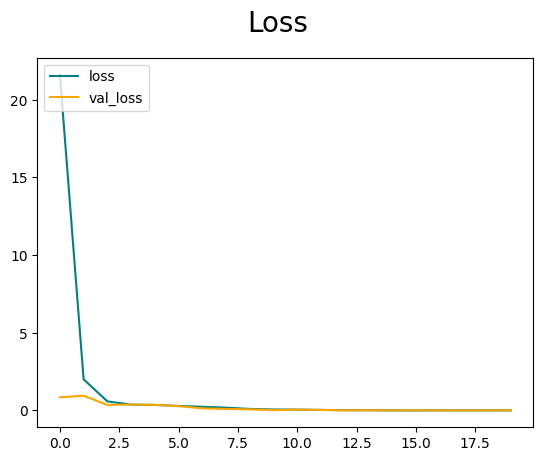

In [52]:
fig = plt.figure()
plt.plot(hist.history['loss'], color ='teal', label ='loss')
plt.plot(hist.history['val_loss'], color ='orange', label ='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

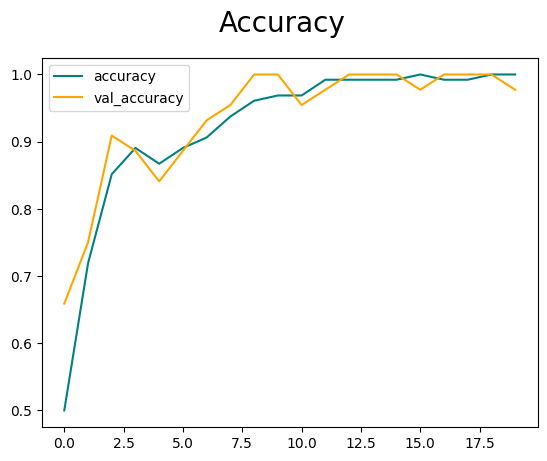

In [53]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color ='teal', label ='accuracy')
plt.plot(hist.history['val_accuracy'], color ='orange', label ='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [54]:
#Evaluate Performance

In [55]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [56]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [57]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 107ms/step


In [58]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:0.9166666865348816, Accuracy:0.96875


In [59]:
#Test

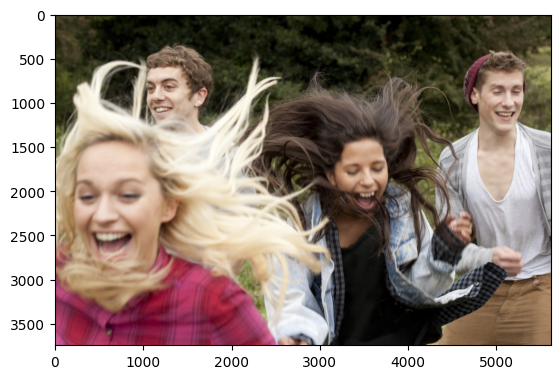

In [72]:
img = cv2.imread('Happy.jpg')
#plt.imshow(img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

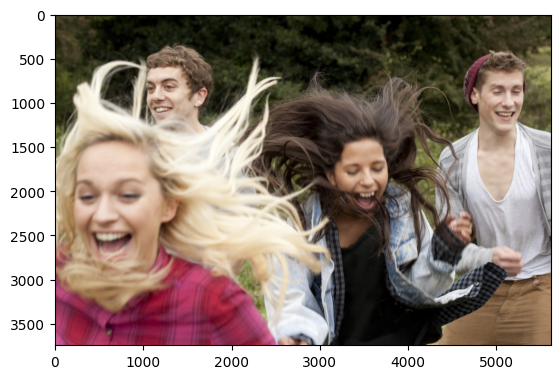

In [73]:
img2 = cv2.imread('sad.jpg')
#plt.imshow(img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

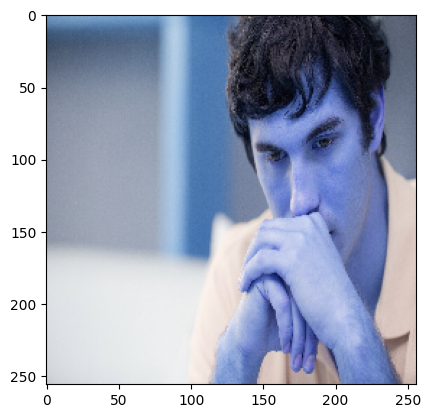

In [79]:
resize = tf.image.resize(img2, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [80]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [81]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 23ms/step


In [82]:
yhat

array([[0.51744246]], dtype=float32)

In [83]:
if yhat > 0.5:
    print("Sad")
else:
    print("Happy")
    

Sad


In [84]:
from tensorflow.keras.models import load_model

In [86]:
model.save(os.path.join('models','happysadmodel.h5'))

In [87]:
new_model = load_model(os.path.join('models','happysadmodel.h5'))

In [91]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 75ms/step


array([[0.51744246]], dtype=float32)